# PyTorch第一步
先介绍pytorch的基础知识，快速入门。

## Tensor
Tensor是PyTorch中重要的数据结构，可认为是一个高维数组。它可以是一个数（标量）、一维数组（向量）、二维数组（矩阵）以及更高维的数组。Tensor和Numpy的ndarrays类似，但Tensor可以使用GPU进行加速。Tensor的使用和Numpy及Matlab的接口十分相似，下面通过几个例子来看看Tensor的基本使用。

In [0]:
from __future__ import print_function
import torch as t
t.__version__

'1.0.1.post2'

构建$5\times 3$的矩阵，只是分配了恐怖关键，未初始化。

In [0]:
x=t.Tensor(5,3)
x=t.Tensor([[1,2],[3,4]])
x

tensor([[1., 2.],
        [3., 4.]])

使用【0，1】均匀分布随机初始化二维数组

In [0]:
x=t.rand(5,3)
x

tensor([[0.0102, 0.9915, 0.7232],
        [0.6824, 0.7370, 0.9734],
        [0.2880, 0.8735, 0.4868],
        [0.3590, 0.8849, 0.1218],
        [0.0538, 0.5620, 0.9562]])

查看x的形状

In [0]:
print(x.size())
x.size()[1],x.size(1) #两种写法等价

torch.Size([5, 3])


(3, 3)

tensor.Size是tuple对象的子类，因此它支持tuple的所有操作，如x.size[0]

In [0]:
print(x.shape)
x.shape[0]

torch.Size([5, 3])


5

加法运算

In [0]:
y=t.rand(5,3)

#加法运算第一种写法
x+y

tensor([[0.9517, 1.1541, 1.1738],
        [0.8608, 1.6968, 1.6411],
        [1.2032, 1.6981, 0.9922],
        [0.9644, 1.3020, 1.0702],
        [0.9234, 1.2086, 1.0581]])

In [0]:
#第二种写法
t.add(x,y)

tensor([[0.9517, 1.1541, 1.1738],
        [0.8608, 1.6968, 1.6411],
        [1.2032, 1.6981, 0.9922],
        [0.9644, 1.3020, 1.0702],
        [0.9234, 1.2086, 1.0581]])

In [0]:
#第三种写法，指定结果输出为result
result=t.Tensor(5,3) #预先分配空间
t.add(x,y,out=result)
result

tensor([[0.9517, 1.1541, 1.1738],
        [0.8608, 1.6968, 1.6411],
        [1.2032, 1.6981, 0.9922],
        [0.9644, 1.3020, 1.0702],
        [0.9234, 1.2086, 1.0581]])

In [0]:
print('最初的y')
print(y)

print('第一种加法，y的结果')
y.add(x)
print(y)

print('第二种加法，y的结果')
y.add_(x) #inplace加法，y变了
print(y)

最初的y
tensor([[0.9415, 0.1626, 0.4506],
        [0.1783, 0.9598, 0.6677],
        [0.9152, 0.8246, 0.5054],
        [0.6054, 0.4171, 0.9484],
        [0.8696, 0.6467, 0.1019]])
第一种加法，y的结果
tensor([[0.9415, 0.1626, 0.4506],
        [0.1783, 0.9598, 0.6677],
        [0.9152, 0.8246, 0.5054],
        [0.6054, 0.4171, 0.9484],
        [0.8696, 0.6467, 0.1019]])
第二种加法，y的结果
tensor([[0.9517, 1.1541, 1.1738],
        [0.8608, 1.6968, 1.6411],
        [1.2032, 1.6981, 0.9922],
        [0.9644, 1.3020, 1.0702],
        [0.9234, 1.2086, 1.0581]])


注意，函数名后面带下划线_ 的函数会修改Tensor本身。例如，x.add_(y)和x.t_()会改变 x，但x.add(y)和x.t()返回一个新的Tensor， 而x不变。

tensor索引

In [0]:
x[:,1]

tensor([0.9915, 0.7370, 0.8735, 0.8849, 0.5620])

Tensor还支持很多操作，包括数学运算、线性代数、选择、切片等等，其接口设计与Numpy极为相似。更详细的使用方法，会在第三章系统讲解。

Tensor和Numpy的数组之间的互操作非常容易且快速。对于Tensor不支持的操作，可以先转为Numpy数组处理，之后再转回Tensor。c

In [0]:
a=t.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [0]:
b=a.numpy() #tensor to numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

numpy to tensor

In [0]:
import numpy as np
a=np.ones(5)
b=t.from_numpy(a)
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


如果你想获取某一个元素的值，可以使用scalar.item。 直接tensor[idx]得到的还是一个tensor: 一个0-dim 的tensor，一般称为scalar.

In [0]:
scalar=b[0]
scalar

tensor(1., dtype=torch.float64)

In [0]:
scalar.size()

torch.Size([])

In [0]:
# 使用scalar().item()从中取出python对象数值
scalar.item()

1.0

In [0]:
tensor=t.tensor([1])
tensor,scalar

(tensor([1]), tensor(1., dtype=torch.float64))

In [0]:
tensor.shape,scalar.shape

(torch.Size([1]), torch.Size([]))

In [0]:
# 只有一个元素的tensor也可以调用item
tensor.item(),scalar.item()

(1, 1.0)

此外在pytorch中还有一个和np.array 很类似的接口: torch.tensor, 二者的使用十分类似。

In [0]:
tensor=t.tensor([3,4]) #创建一个有两个元素的一维tensor

In [0]:
scalar=t.tensor(3)#常见0维的tensor,即scalar
scalar,scalar.shape,tensor,tensor.shape

(tensor(3), torch.Size([]), tensor([3, 4]), torch.Size([2]))

需要注意的是，t.tensor()总是会进行数据拷贝，新tensor和原来的数据不再共享内存。所以如果你想共享内存的话，建议使用torch.from_numpy()或者tensor.detach()来新建一个tensor, 二者共享内存。

In [0]:
old_tensor=tensor
new_tensor=t.tensor(old_tensor)
new_tensor[0]=11
old_tensor,new_tensor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(tensor([3, 4]), tensor([11,  4]))

In [0]:
new_tenso=old_tensor.detach() #好像不行
new_tensor[0]=1111
old_tensor,new_tensor

(tensor([3, 4]), tensor([1111,    4]))

Tensor可通过.cuda 方法转为GPU的Tensor，从而享受GPU带来的加速运算。

In [0]:
device=t.device('cuda:0' if t.cuda.is_available() else 'cpu')
x=x.to(device)
y=y.to(device)
z=x+y
device,z

(device(type='cuda', index=0), tensor([[0.9619, 2.1455, 1.8970],
         [1.5432, 2.4338, 2.6144],
         [1.4912, 2.5717, 1.4790],
         [1.3234, 2.1870, 1.1920],
         [0.9773, 1.7706, 2.0142]], device='cuda:0'))

## autograd:自动微分

深度学习的算法本质上是通过反向传播求导数，而PyTorch的autograd模块则实现了此功能。在Tensor上的所有操作，autograd都能为它们自动提供微分，避免了手动计算导数的复杂过程。

![](http://localhost:8888/notebooks/pytorch/pytorch-book-master/chapter2-%E5%BF%AB%E9%80%9F%E5%85%A5%E9%97%A8/imgs/autograd_Variable.svg)

从0.4起, Variable 正式合并入Tensor, Variable 本来实现的自动微分功能，Tensor就能支持。读者还是可以使用Variable(tensor), 但是这个操作其实什么都没做。建议读者以后直接使用tensor.

要想使得Tensor使用autograd功能，只需要设置tensor.requries_grad=True.

In [0]:
# 为tensor设置requries_grad=True,代表需要求导
# pytorch会自动调用autograd记录操作

x=t.ones(2,2,requires_grad=True)

#上步等价于
#x=t.ones(2,2)
#x.requried_grad=True

x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [0]:
y=x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [0]:
y.grad_fn

In [0]:
y.backward() #反向传播，计算梯度

In [0]:
x.grad #取x得梯度

tensor([[1., 1.],
        [1., 1.]])

注意：grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以反向传播之前需把梯度清零。

In [0]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [0]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

梯度清理 zero_，\_代表inplace操作，会修改自身，如add\_

In [0]:
x.grad.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [0]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

## 神经网络

Autograd实现了反向传播功能，但是直接用来写深度学习的代码在很多情况下还是稍显复杂，torch.nn是专门为神经网络设计的模块化接口。nn构建于 Autograd之上，可用来定义和运行神经网络。nn.Module是nn中最重要的类，可把它看成是一个网络的封装，包含网络各层定义以及forward方法，调用forward(input)方法，可返回前向传播的结果。下面就以最早的卷积神经网络：LeNet为例，来看看如何用nn.Module实现。LeNet的网络结构如图2-7所示。

![](http://localhost:8888/notebooks/pytorch/pytorch-book-master/chapter2-%E5%BF%AB%E9%80%9F%E5%85%A5%E9%97%A8/imgs/nn_lenet.png)

这是一个基础的前向传播(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。

### 定义网络

定义网络时，需要基础nn.Module类，类似于mxnet中得nn.Block类。并实现它的forward方法，把网络中具有可学习参数的层放在构造函数\_\_init\_\_中。如果某一层(如ReLU)不具有可学习的参数，则既可以放在构造函数中，也可以不放，但建议不放在其中，而在forward中使用nn.functional代替。

In [0]:
from torch import nn
import torch.nn.functional as F

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    
    #卷积层1 ‘1’代表输入图像为单通道，‘6’代表输出通道数，‘5’代表卷积核为5*5
    self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
    #卷积层2
    self.conv2=nn.Conv2d(6,16,5)
    #仿射函层，全连接层，y=Wx+b
    #第一个参数为输入节点个数，第二个为输出个数
    self.fc1=nn.Linear(in_features=16*5*5,out_features=120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
    
  def forward(self,X):
    X=F.max_pool2d(F.relu(self.conv1(X)),(2,2))
    X=F.max_pool2d(F.relu(self.conv2(X)),2)
    #reshape
    X=X.view(X.size()[0],-1)
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return X   

In [0]:
net=LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要在nn.Module的子类中定义了forward函数，backward函数就会自动被实现(利用autograd)。在forward 函数中可使用任何tensor支持的函数，还可以使用if、for循环、print、log等Python语法，写法和标准的Python写法一致。

网络的可学习参数通过net.parameters()返回，net.named_parameters可同时返回可学习的参数及名称。

In [0]:
params=list(net.parameters())
print(len(params))

10


In [0]:
for name,parameters in net.named_parameters():
  print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward 输入和输出都是tensor

In [0]:
input=t.randn(1,1,32,32)
input.shape

torch.Size([1, 1, 32, 32])

In [0]:
out=net(input)
out.size()

torch.Size([1, 10])

所有参数清零


In [0]:
net.zero_grad()
out.backward(t.ones(1,10)) #反向传播

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 input.unsqueeze(0)将batch_size设为１。例如 nn.Conv2d 输入必须是4维的，形如 𝑛𝑆𝑎𝑚𝑝𝑙𝑒𝑠×𝑛𝐶ℎ𝑎𝑛𝑛𝑒𝑙𝑠×𝐻𝑒𝑖𝑔ℎ𝑡×𝑊𝑖𝑑𝑡ℎ 。可将nSample设为1，即 1×𝑛𝐶ℎ𝑎𝑛𝑛𝑒𝑙𝑠×𝐻𝑒𝑖𝑔ℎ𝑡×𝑊𝑖𝑑𝑡ℎ 。

### 损失函数
nn实现了神经网络中大多数的损失函数，例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失。

In [0]:
output=net(input)
target=t.arange(0,10,dtype=t.float32).view(1,10)
criterion=nn.MSELoss()
loss=criterion(output,target)
loss

tensor(27.9013, grad_fn=<MseLossBackward>)

如果对loss进行反向传播溯源(使用gradfn属性)，可看到它的计算图如下：

input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear  
      -> MSELoss  
      -> loss  
当调用loss.backward()时，该图会动态生成并自动微分，也即会自动计算图中参数(Parameter)的导数。

In [0]:
t.sum(t.pow(output-target,2))/10

tensor(27.9013, grad_fn=<DivBackward0>)

In [0]:
net.zero_grad()
print('反向传播之前，conv1.bia的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播后，conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前，conv1.bia的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播后，conv1.bias的梯度
tensor([-0.0979, -0.1158,  0.0317, -0.0062, -0.2042, -0.1009])


### 优化器
在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和参数，例如随机梯度下降法(SGD)的更新策略如下：

weight = weight - learning_rate * gradient

手动实现如下：
```
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)# inplace 减法
```
torch.optim中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用，因此大多数时候并不需要手动写上述代码。

In [0]:
net.conv1.bias.grad.data,net.conv1.bias.grad

(tensor([-0.0979, -0.1158,  0.0317, -0.0062, -0.2042, -0.1009]),
 tensor([-0.0979, -0.1158,  0.0317, -0.0062, -0.2042, -0.1009]))

In [0]:
from torch import optim

optimizer=optim.SGD(net.parameters(),lr=0.01)

#训练过程中
#先梯度清理与net.zero_grad()效果一样
optimizer.zero_grad()

#计算损失
output=net(input)
loss=criterion(output,target)

#反向传播
loss.backward()

#更新参数
optimizer.step()

### 数据加载与预处理
在深度学习中数据加载及预处理是非常复杂繁琐的，但PyTorch提供了一些可极大简化和加快数据处理流程的工具。同时，对于常用的数据集，PyTorch也提供了封装好的接口供用户快速调用，这些数据集主要保存在torchvison中。

torchvision实现了常用的图像数据加载功能，例如Imagenet、CIFAR10、MNIST等，以及常用的数据转换操作，这极大地方便了数据加载，并且代码具有可重用性。


## 小试牛刀
下面我们来尝试实现对CIFAR-10数据集的分类，步骤如下:

* 使用torchvision加载并预处理CIFAR-10数据集
* 定义网络
* 定义损失函数和优化器
* 训练网络并更新网络参数
* 测试网络

### CIFAR-10数据加载和预处理

CIFAR-10是一个常用的彩色图片数据集，它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是 3×32×32 ，也即3-通道彩色图片，分辨率为 32×32 。

In [0]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show=ToPILImage() #可以把Tensor转成Image，方便可视化

In [0]:
# 定义对数据的预处理
transform=transforms.Compose([transforms.ToTensor(),#转化为tensor
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) #归一化，均值和方差

#训练集
trainset=tv.datasets.CIFAR10(root='/home/cy/tmp/data',
                            train=True,
                            download=True,
                            transform=transform)

trainloader=t.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

#测试集
testset=tv.datasets.CIFAR10(root='/home/cy/tmp/data',
                           train=False,
                           download=True,
                           transform=transform)
testloader=t.utils.data.DataLoader(testset,batch_size=4,shuffle=False)


#类
classes=('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
!cd /home/cy/tmp/data
!ls
!cd ./sample_data
!ls -a

sample_data
.  ..  .config	sample_data


Dataset对象是一个数据集，可以按照下标访问，返回形如（data,label）的数据

ship


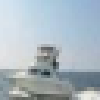

In [0]:
data,label=trainset[100]
print(classes[label])

#（data+1）/2 是为了还原被归一化的数据,归一化时：（x-0.5）/0.5=x 则原来x=(x+1)/2
show((data+1)/2).resize((100,100))

Dataloader是一个可迭代的对象，但不是生成器，即能使用for访问，但不能使用next()访问。它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

In [0]:
from collections import Iterable
from types import GeneratorType
isinstance(trainloader,Iterable),isinstance(trainloader,GeneratorType)

(True, False)

      horse        ship        deer         dog


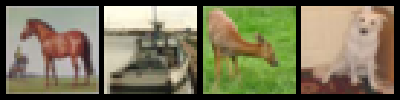

In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(' '.join('%11s' % classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

### 定义网络
拷贝上面的LeNet网络，修改self.conv1第一个参数为3通道，因CIFAR-10是3通道彩图。

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    
    #卷积层1 ‘1’代表输入图像为单通道，‘6’代表输出通道数，‘5’代表卷积核为5*5
    self.conv1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)
    #卷积层2
    self.conv2=nn.Conv2d(6,16,5)
    #仿射函层，全连接层，y=Wx+b
    #第一个参数为输入节点个数，第二个为输出个数
    self.fc1=nn.Linear(in_features=16*5*5,out_features=120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
    
  def forward(self,X):
    X=F.max_pool2d(F.relu(self.conv1(X)),(2,2))
    X=F.max_pool2d(F.relu(self.conv2(X)),2)
    #reshape
    X=X.view(X.size()[0],-1)
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return X   

In [0]:
net=LeNet()
print(net)

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 定义损失函数和优化器

In [0]:
from torch import optim
loss=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

## 训练网络
所有网络的训练流程都是类似的，不断地执行如下流程：

* 输入数据
* 前向传播+反向传播
* 更新参数

In [0]:
t.set_num_threads(8)
for epoch in range(2):
  running_loss=0
  for i,data in enumerate(trainloader,0):
    
    #输入数据
    inputs,labels=data
    
    #梯度清零
    optimizer.zero_grad()
    
    #foraward+backward
    outputs=net(inputs)
    ls=loss(outputs,labels)
    ls.backward()
    
    #更新参数
    optimizer.step()
    
    #打印log
    #ls是一个scalar,需要使用ls.item()来获取数值，不能使用ls[0]
    running_loss+=ls.item()
    if i %2000 ==1999: #每2000个batch打印一下训练状态
      print('[%d,%5d] loss: %.3f' % (epoch+1,i+1,running_loss/2000))
      running_loss=0
      
print('Finished Training')
  

[1, 2000] loss: 1.674
[1, 4000] loss: 1.583
[1, 6000] loss: 1.549
[1, 8000] loss: 1.490
[1,10000] loss: 1.443
[1,12000] loss: 1.411
Finished Training
[2, 2000] loss: 1.333
[2, 4000] loss: 1.332
[2, 6000] loss: 1.297
[2, 8000] loss: 1.278
[2,10000] loss: 1.254
[2,12000] loss: 1.236
Finished Training


此处仅训练了2个epoch（遍历完一遍数据集称为一个epoch），来看看网络有没有效果。将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

实际的label:      cat     ship     ship    plane


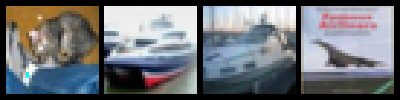

In [0]:
dataiter=iter(testloader)
images,labels=dataiter.next()
print('实际的label:',' '.join('%08s' % classes[labels[j]] for j in range(4)))

show(tv.utils.make_grid(images/2-0.5)).resize((400,100))

接着计算网络预测的label：

In [0]:
outpus=net(images)
_,predicted=t.max(outputs,1)

print('预测结果：',' '.join('%05s' % classes[predicted[j]] for j in range(4)))

预测结果：   car  deer truck   cat


已经可以看出效果，准确率50%，但这只是一部分的图片，再来看看在整个测试集上的效果。

In [0]:
correct=0
total=0

with t.no_grad():
  for data in testloader:
    images,labels=data
    outputs=net(images)
    _,predicted=t.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum()
    
print('10000张测试集中的准确率为： %d %%' % (100*correct/total))

10000张测试集中的准确率为： 56 %


训练的准确率远比随机猜测(准确率10%)好，证明网络确实学到了东西。

### 在GPU上训练
就像之前把Tensor从CPU转到GPU一样，模型也可以类似地从CPU转到GPU。

In [0]:
device = t.device('cuda:0' if t.cuda.is_available() else 'cpu')

net.to(device)
images=images.to(device)

labels=labels.to(device)
output=net(images)
ls=loss(output,labels)

ls

tensor(1.4004, device='cuda:0', grad_fn=<NllLossBackward>)

## 总结

* Tensor: 类似Numpy数组的数据结构，与Numpy接口类似，可方便地互相转换。
* autograd/: 为tensor提供自动求导功能。
* nn: 专门为神经网络设计的接口，提供了很多有用的功能(神经网络层，损失函数，优化器等)。
* 神经网络训练: 以CIFAR-10分类为例演示了神经网络的训练流程，包括数据加载、网络搭建、训练及测试。